In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)
print('py ver: ', sys.version)
print('tf ver: ', tf.__version__)
print('keras ver: ',keras.__version__)

py ver:  3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
tf ver:  2.1.0
keras ver:  2.3.1


11493376/11490434 [==============================] - 3s 0us/step


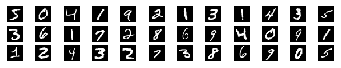

In [6]:
mnist = keras.datasets.mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

import matplotlib.pylab as plt

plt.figure(figsize=(6,1))
for i in range(36):
    plt.subplot(3,12,i+1)
    plt.imshow(X_train0[i], cmap="gray")
    plt.axis("off")
plt.show()

In [7]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

print('x_train shape: ', x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

batch_size =128
num_classes = 10
epochs = 12

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),strides=(1,1),padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64,(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)             

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])
hist=model.fit(x_train,y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.1807 - accuracy: 0.9450 - val_loss: 0.0493 - val_accuracy: 0.9835
Epoch 2/12
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.0373 - val_accuracy: 0.9877
Epoch 3/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0248 - val_accuracy: 0.9920
Epoch 4/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.0241 - val_accuracy: 0.9908
Epoch 5/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0209 - val_accuracy: 0.9924
Epoch 6/12
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0196 - val_accuracy: 0.9931
Epoch 7/12
60000/60000 [==============================] - 171s

Test loss:  0.023919244562353652
Test accuracy:  0.9919999837875366


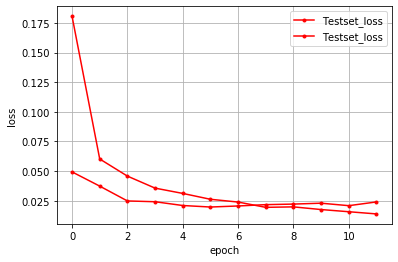

In [16]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ',score[1])

import numpy as np
y_vloss=hist.history['val_loss']
y_loss=hist.history['loss']
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c="red",label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c="red",label='Testset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

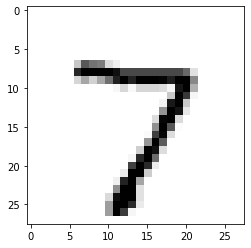

The Answer is  [7]


In [18]:
n=0
plt.imshow(x_test[n].reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()
print('The Answer is ',model.predict_classes(x_test[n].reshape((1,28,28,1))))